<a href="https://colab.research.google.com/github/GENNYB7/KMeans-CLustering/blob/main/KMeansClusteringexercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [72]:
cust_df = pd.read_csv('/content/drive/MyDrive/Coding_Dojo/Machine Learning/cust_seg.csv')

In [73]:
cust_df

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...,...
845,845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,848,849,32,1,12,28,0.116,0.696,0.0,2.9


Dropping column Unnnamed as it dosent seem relevant


In [74]:
cust_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [75]:
cust_df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [76]:
cust_df.set_index('Customer Id', inplace = True)

In [77]:
cust_df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,NaN,6.8
847,28,2,7,34,0.359,2.021,0.0,7.0
848,25,4,0,18,2.802,3.210,1.0,33.4


In [78]:
cust_df.isnull().any()

Age                False
Edu                False
Years Employed     False
Income             False
Card Debt          False
Other Debt         False
Defaulted           True
DebtIncomeRatio    False
dtype: bool

In [79]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


In [80]:

cust_df['Defaulted'].isnull()

Customer Id
1      False
2      False
3      False
4      False
5      False
       ...  
846     True
847    False
848    False
849    False
850    False
Name: Defaulted, Length: 850, dtype: bool

In [81]:
 cust_df.drop('Defaulted', axis = 1, inplace = True)
 cust_df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
Customer Id,,,,,,,
1,41,2,6,19,0.124,1.073,6.3
2,47,1,26,100,4.582,8.218,12.8
3,33,2,10,57,6.111,5.802,20.9
4,29,2,4,19,0.681,0.516,6.3
5,47,1,31,253,9.308,8.908,7.2
...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,6.8
847,28,2,7,34,0.359,2.021,7.0
848,25,4,0,18,2.802,3.210,33.4


In [82]:
#scale data
scaler = StandardScaler()

scaled_df = scaler.fit_transform(cust_df)

Text(0.5, 0, 'Age')

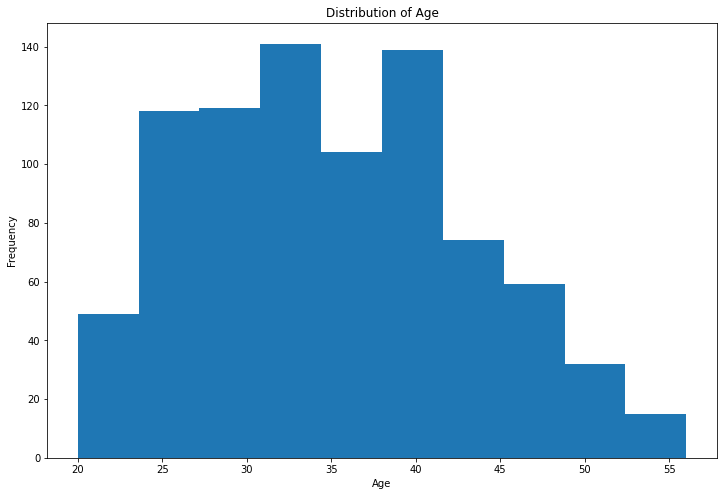

In [83]:

fig, ax = plt.subplots(figsize=(12,8))

n, bar_labelins, patches = ax.hist(cust_df['Age'])

ax.set_title('Distribution of Age')
ax.set_ylabel('Frequency')
ax.set_xlabel('Age')

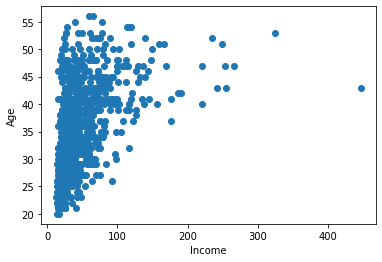

In [84]:
plt.scatter(cust_df['Income'], cust_df['Age'])
plt.xlabel('Income')
plt.ylabel('Age');

In [85]:
#KMeans lesson
#Instantiate KMeans

kmeans = KMeans(n_clusters= 2)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Cluster of Income by Age')

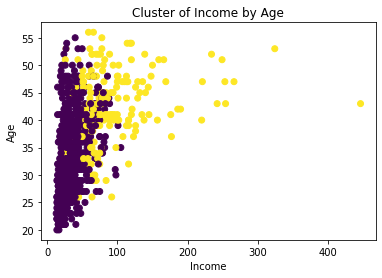

In [88]:
#per lesson save the cluster to the dataframe
cust_df['cluster'] = kmeans.labels_
#per lesson visualize the cluster
plt.scatter(cust_df['Income'], cust_df['Age'], c = cust_df['cluster'])
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Cluster of Income by Age')

Education - years employed relation

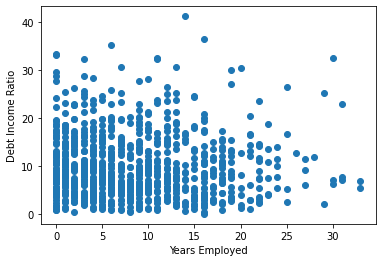

In [94]:
plt.scatter(cust_df['Years Employed'], cust_df['DebtIncomeRatio'])
plt.xlabel('Years Employed')
plt.ylabel('Debt Income Ratio');

In [95]:
kmeans = KMeans(n_clusters= 2)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

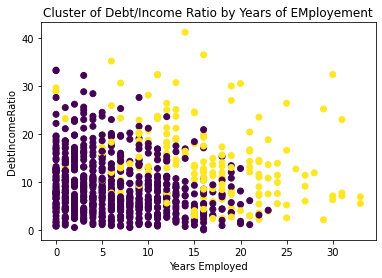

In [97]:
#per lesson save the cluster to the dataframe
cust_df['cluster'] = kmeans.labels_
#per lesson visualize the cluster
plt.scatter(cust_df['Years Employed'], cust_df['DebtIncomeRatio'], c = cust_df['cluster'])
plt.xlabel('Years Employed')
plt.ylabel('DebtIncomeRatio')
plt.title('Cluster of Debt/Income Ratio by Years of EMployement');